In [43]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import(PowerNorm,LogNorm)
from astropy.io import fits
from astropy.stats import sigma_clipped_stats
import os
import scipy.ndimage as snd
from scipy import signal
import astroalign as aa
from scipy.stats import mode

# Read in Biases, Darks, and Flats

In [44]:
bias = fits.getdata('./Output/bias.fits')
dark = fits.getdata('./Output/dark.fits')
flat_B = fits.getdata('./Output/flat_B.fits')
flat_R = fits.getdata('./Output/flat_R.fits')
flat_I = fits.getdata('./Output/flat_I.fits')
flat_V = fits.getdata('./Output/flat_V.fits')
flat_Ha = fits.getdata('./Output/flat_Ha.fits')

# M51

In [45]:
#Get Data
M51_names = ['100sB.00000080','100sB.00000081',
            '120sR.00000084','120sR.00000085',
            '150sI.00000086','150sI.00000087','150sI.00000088',
            '150sV.00000082','150sV.00000083',
            '300sHa.00000090','300sHa.00000091','300sHa.00000092']

M51_B_name = ['100sB.00000080','100sB.00000081']
M51_R_name = ['120sR.00000084','120sR.00000085']
M51_I_name = ['150sI.00000086','150sI.00000087','150sI.00000088']
M51_V_name = ['150sV.00000082','150sV.00000083']
M51_Ha_name = ['300sHa.00000090','300sHa.00000091','300sHa.00000092']

M51Bs = [fits.getdata('./Data/2018-05-17/M51/%s.M 51.fit' % name) for name in M51_B_name]
M51Rs = [fits.getdata('./Data/2018-05-17/M51/%s.M 51.fit' % name) for name in M51_R_name]
M51Is = [fits.getdata('./Data/2018-05-17/M51/%s.M 51.fit' % name) for name in M51_I_name]
M51Vs = [fits.getdata('./Data/2018-05-17/M51/%s.M 51.fit' % name) for name in M51_V_name]
M51Has = [fits.getdata('./Data/2018-05-17/M51/%s.M 51.fit' % name) for name in M51_Ha_name]

In [46]:
B_stats_raw = np.ndarray((len(M51Bs),3))

for i in range(len(M51Bs)):
    B_stats_raw[i] = sigma_clipped_stats(M51Bs[i],sigma=3,iters=3)

In [47]:
B_medians_raw = np.ndarray(len(M51Bs))
B_sigmas_raw = np.ndarray(len(M51Bs))

for i in range(len(M51Bs)):
    B_medians_raw[i] = B_stats_raw[i][1]
    B_sigmas_raw[i] = B_stats_raw[i][2]
    
print B_medians_raw
print B_sigmas_raw

[ 1581.  1578.]
[ 25.39019958  25.16504386]


In [48]:
#Reduce Data
B_reds = (M51Bs-(dark-bias)*(100/200)-bias)/((flat_B-bias)/np.median(flat_B-bias))
B_red = np.median(B_reds,axis=0)

R_reds = (M51Rs-(dark-bias)*(120/200)-bias)/((flat_R-bias)/np.median(flat_R-bias))
R_red = np.median(R_reds,axis=0)

I_reds = (M51Is-(dark-bias)*(150/200)-bias)/((flat_I-bias)/np.median(flat_I-bias))
I_red = np.median(I_reds,axis=0)

V_reds = (M51Vs-(dark-bias)*(150/200)-bias)/((flat_V-bias)/np.median(flat_V-bias))
V_red = np.median(V_reds,axis=0)

Ha_reds = (M51Has-(dark-bias)*(300/200)-bias)/((flat_Ha-bias)/np.median(flat_Ha-bias))
Ha_red = np.median(Ha_reds,axis=0)

In [49]:
B_stats = np.ndarray((len(B_reds),3))

for i in range(len(B_reds)):
    B_stats[i] = sigma_clipped_stats(B_reds[i],sigma=3,iters=3)

In [50]:
B_medians = np.ndarray(len(B_reds))
B_sigmas = np.ndarray(len(B_reds))

for i in range(len(B_reds)):
    B_medians[i] = B_stats[i][1]
    B_sigmas[i] = B_stats[i][2]
    
print B_medians
print B_sigmas

[ 350.5807743   347.76224579]
[ 19.05011524  18.99775489]


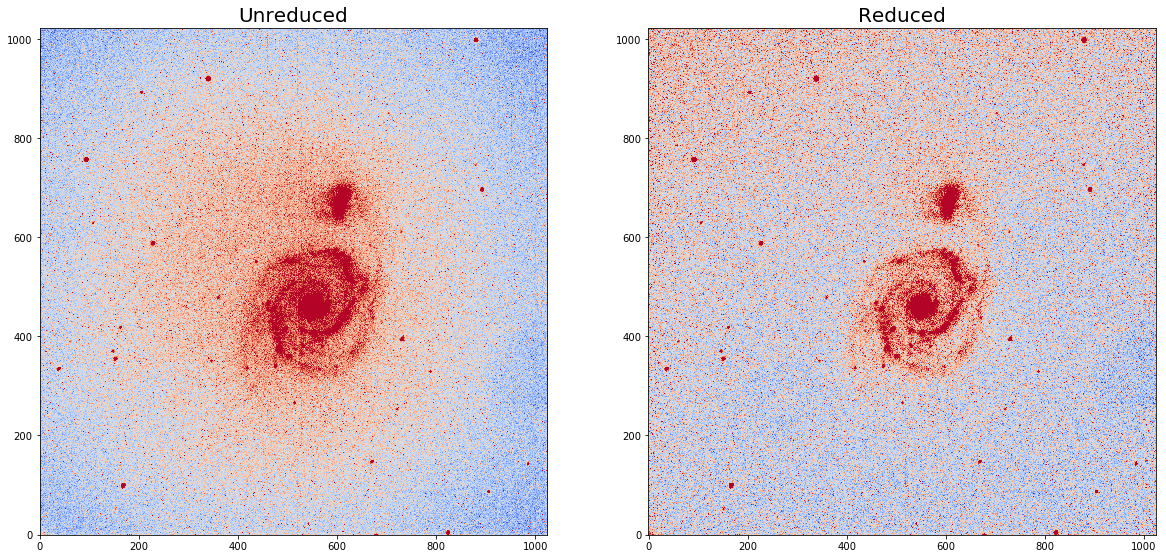

In [51]:
fig = plt.figure(figsize=((20,20)))
plt.subplot(121)
plt.title('Unreduced', fontsize=20)
plt.imshow(M51Bs[0],vmin=B_medians_raw[0]-3*B_sigmas_raw[0],vmax=B_medians_raw[0]+3*B_sigmas_raw[0],cmap=plt.cm.coolwarm, origin='lower')
plt.subplot(122)
plt.title('Reduced', fontsize=20)
plt.imshow(B_reds[0],vmin=B_medians[0]-3*B_sigmas[0],vmax=B_medians[0]+3*B_sigmas[0],cmap=plt.cm.coolwarm, origin='lower')
plt.show()
#fig.savefig('./ISM_B_ex.pdf',bbox_inches='tight')

In [52]:
#Save Data
os.remove('./Output/M51_B_red.fits')
os.remove('./Output/M51_R_red.fits')
os.remove('./Output/M51_I_red.fits')
os.remove('./Output/M51_V_red.fits')
os.remove('./Output/M51_Ha_red.fits')

hdu_B_red = fits.PrimaryHDU(B_red)
hdul_B_red = fits.HDUList([hdu_B_red])
hdu_B_red.writeto('./Output/M51_B_red.fits')

hdu_R_red = fits.PrimaryHDU(R_red)
hdul_R_red = fits.HDUList([hdu_R_red])
hdu_R_red.writeto('./Output/M51_R_red.fits')

hdu_I_red = fits.PrimaryHDU(I_red)
hdul_I_red = fits.HDUList([hdu_I_red])
hdu_I_red.writeto('./Output/M51_I_red.fits')

hdu_V_red = fits.PrimaryHDU(V_red)
hdul_V_red = fits.HDUList([hdu_V_red])
hdu_V_red.writeto('./Output/M51_V_red.fits')

hdu_Ha_red = fits.PrimaryHDU(Ha_red)
hdul_Ha_red = fits.HDUList([hdu_Ha_red])
hdu_Ha_red.writeto('./Output/M51_Ha_red.fits')

[344.0, 344.0]


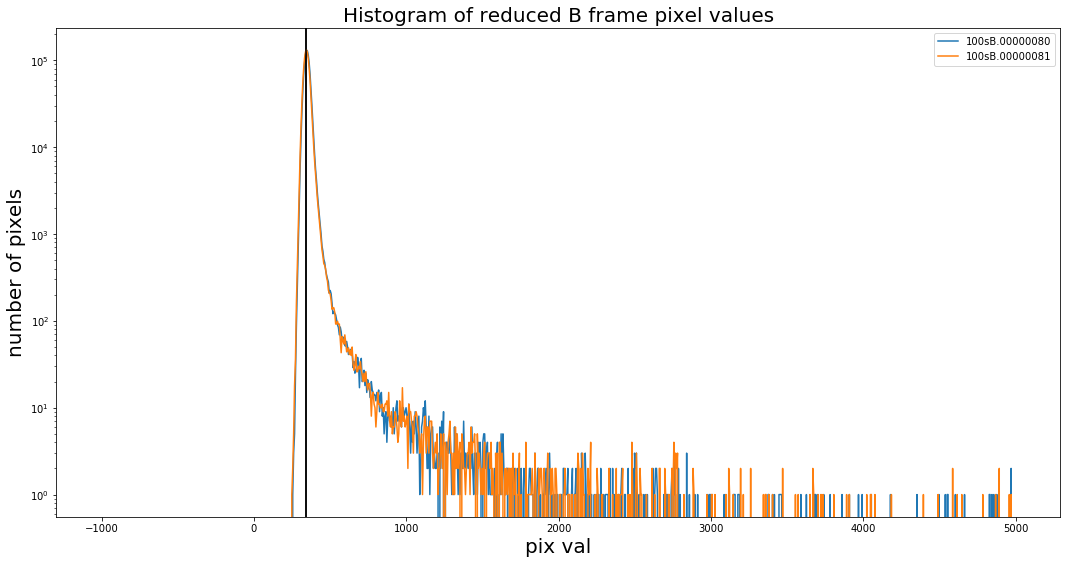

In [53]:
plt.figure(figsize=(18,9))
skylevels=[]
for i in range(len(B_reds)):
    numpix,aduvals=np.histogram(B_reds[i].flatten(),bins=1000,range=[-1e3,5e3])
    skylevel=aduvals[np.where(numpix==numpix.max())][0]
    skylevels.append(skylevel)
    plt.plot(aduvals[:-1],numpix,label=str(M51_B_name[i].split('/')[-1]))
    plt.axvline(skylevel,color='k')
plt.xlabel('pix val',fontsize=20)
plt.ylabel('number of pixels',fontsize=20)
plt.yscale('log')
plt.legend()
print (skylevels)
plt.title('Histogram of reduced B frame pixel values',fontsize=20)
plt.show()

In [59]:
B_fin = np.empty_like(B_reds)

for i in range(len(B_reds)):
    B_fin[i]=B_reds[i]-np.full((1024,1024),fill_value=skylevels[i])

In [60]:
B_stats_fin = np.ndarray((len(B_fin),3))

for i in range(len(B_reds)):
    B_stats_fin[i] = sigma_clipped_stats(B_fin[i],sigma=3,iters=3)

In [61]:
B_medians_fin = np.ndarray(len(B_fin))
B_sigmas_fin = np.ndarray(len(B_fin))

for i in range(len(B_reds)):
    B_medians_fin[i] = B_stats_fin[i][1]
    B_sigmas_fin[i] = B_stats_fin[i][2]
    
print B_medians_fin
print B_sigmas_fin

[ 6.5807743   3.76224579]
[ 19.05011524  18.99775489]


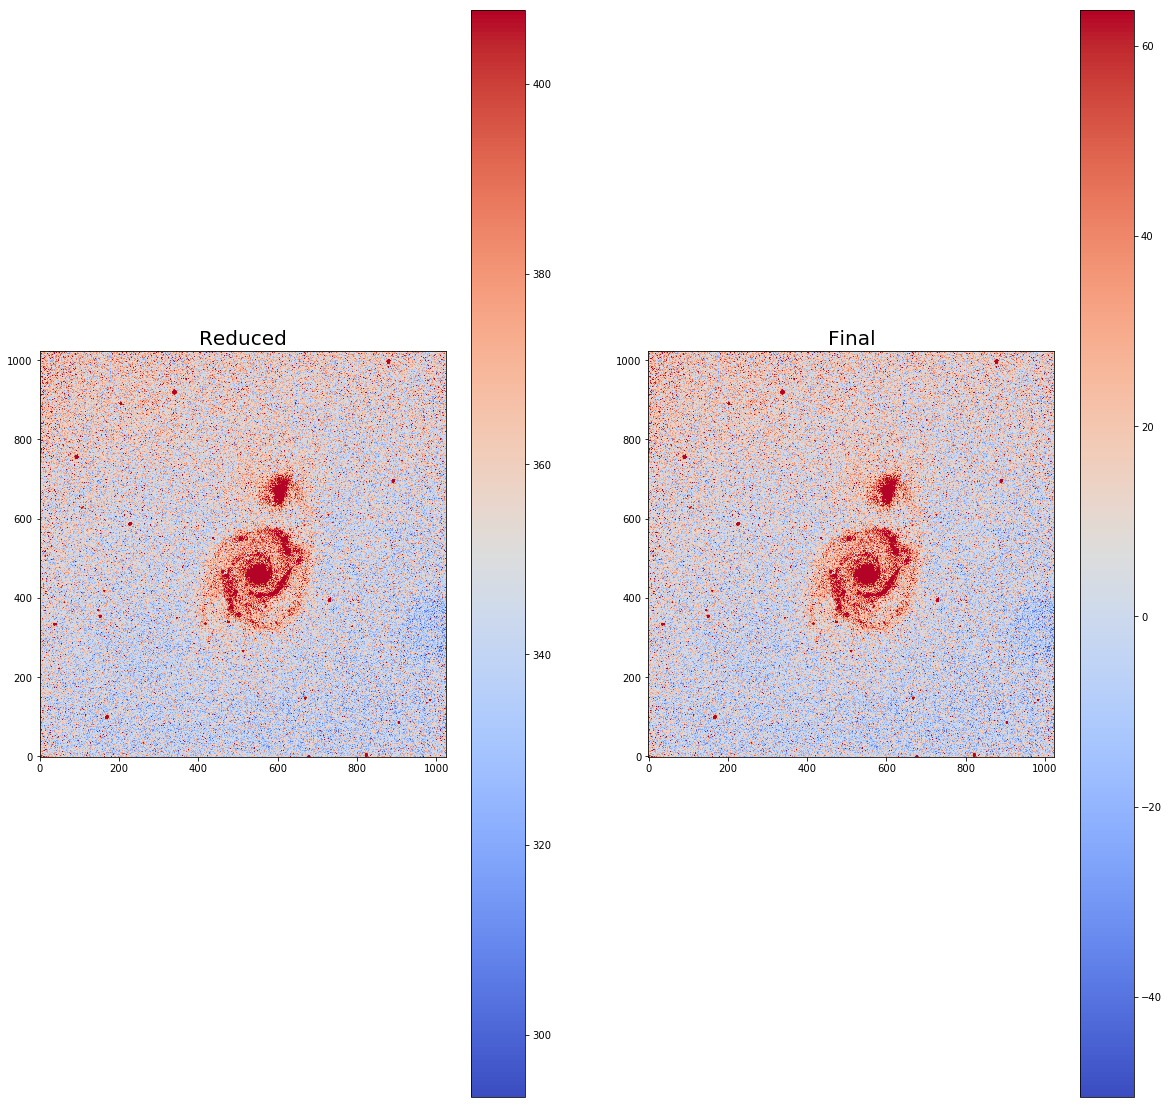

In [66]:
fig = plt.figure(figsize=((20,20)))
plt.subplot(121)
plt.title('Reduced', fontsize=20)
plt.imshow(B_reds[0],vmin=B_medians[0]-3*B_sigmas[0],vmax=B_medians[0]+3*B_sigmas[0],cmap=plt.cm.coolwarm, origin='lower')
plt.colorbar()
plt.subplot(122)
plt.title('Final', fontsize=20)
plt.imshow(B_fin[0],vmin=B_medians_fin[0]-3*B_sigmas_fin[0],vmax=B_medians_fin[0]+3*B_sigmas_fin[0],cmap=plt.cm.coolwarm, origin='lower')
plt.colorbar()
plt.show()
#fig.savefig('./ISM_B_ex.pdf',bbox_inches='tight')

In [37]:
#Remove Sky
os.remove('./Output/M51_B_fin.fits')
os.remove('./Output/M51_R_fin.fits')
os.remove('./Output/M51_I_fin.fits')
os.remove('./Output/M51_V_fin.fits')
os.remove('./Output/M51_Ha_fin.fits')

B_stat  = sigma_clipped_stats(B_red,sigma=3,iters=3)
R_stat  = sigma_clipped_stats(R_red,sigma=3,iters=3)
I_stat  = sigma_clipped_stats(I_red,sigma=3,iters=3)
V_stat  = sigma_clipped_stats(V_red,sigma=3,iters=3)
Ha_stat  = sigma_clipped_stats(Ha_red,sigma=3,iters=3)


B_fin = B_red-B_stat[1]
hdu_B_fin = fits.PrimaryHDU(B_fin)
hdul_B_fin = fits.HDUList([hdu_B_fin])
hdu_B_fin.writeto('./Output/M51_B_fin.fits')

R_fin = R_red-R_stat[1]
hdu_R_fin = fits.PrimaryHDU(R_fin)
hdul_R_fin = fits.HDUList([hdu_R_fin])
hdu_R_fin.writeto('./Output/M51_R_fin.fits')

I_fin = I_red-I_stat[1]
hdu_I_fin = fits.PrimaryHDU(I_fin)
hdul_I_fin = fits.HDUList([hdu_I_fin])
hdu_I_fin.writeto('./Output/M51_I_fin.fits')

V_fin = V_red-V_stat[1]
hdu_V_fin = fits.PrimaryHDU(V_fin)
hdul_V_fin = fits.HDUList([hdu_V_fin])
hdu_V_fin.writeto('./Output/M51_V_fin.fits')

Ha_fin = Ha_red-Ha_stat[1]
hdu_Ha_fin = fits.PrimaryHDU(Ha_fin)
hdul_Ha_fin = fits.HDUList([hdu_Ha_fin])
hdu_Ha_fin.writeto('./Output/M51_Ha_fin.fits')

# Aligning Images

In [ ]:
B_filt=np.ndarray((len(B_reds),1024,1024))

for i in range(len(B_reds)):
    B_filt[i] = signal.medfilt(B_reds[i],7)

In [ ]:
B_filt.shape

In [ ]:
plt.figure(figsize=((20,20)))
plt.subplot(121)
plt.imshow(B_filt[0],vmin=B_medians[0]-3*B_sigmas[0],vmax=B_medians[0]+3*B_sigmas[0],cmap=plt.cm.coolwarm, origin='lower')
plt.subplot(122)
plt.imshow(B_filt[1],vmin=B_medians[1]-3*B_sigmas[1],vmax=B_medians[1]+3*B_sigmas[1],cmap=plt.cm.coolwarm, origin='lower')
plt.show()

In [ ]:
test = aa.register(B_reds[0], B_reds[1])


plt.figure(figsize=(5,5))
plt.imshow(B_reds[1],vmin=B_medians[1]-3*B_sigmas[1],vmax=B_medians[1]+5*B_sigmas[1],cmap=plt.cm.coolwarm)
plt.title('filtered image',fontsize=20)

plt.figure(figsize=(5,5))
plt.imshow(test,vmin=B_medians[1]-3*B_sigmas[1],vmax=B_medians[1]+5*B_sigmas[1],cmap=plt.cm.coolwarm)
plt.title('aligned image',fontsize=20)

plt.figure(figsize=(5,5))
plt.imshow(B_reds[0] - B_reds[1],vmin=-3*B_sigmas[1],vmax=3*B_sigmas[1],cmap=plt.cm.coolwarm)
plt.title('image 0 - original image 1)',fontsize=20)

plt.figure(figsize=(5,5))
plt.imshow(B_reds[0] - test,vmin=-3*B_sigmas[1],vmax=3*B_sigmas[1],cmap=plt.cm.coolwarm)
plt.title('image 0 - aligned image 1',fontsize=20)

plt.show()

In [ ]:
# use mode from scipy to normalize flat field

[338.0, 332.0]


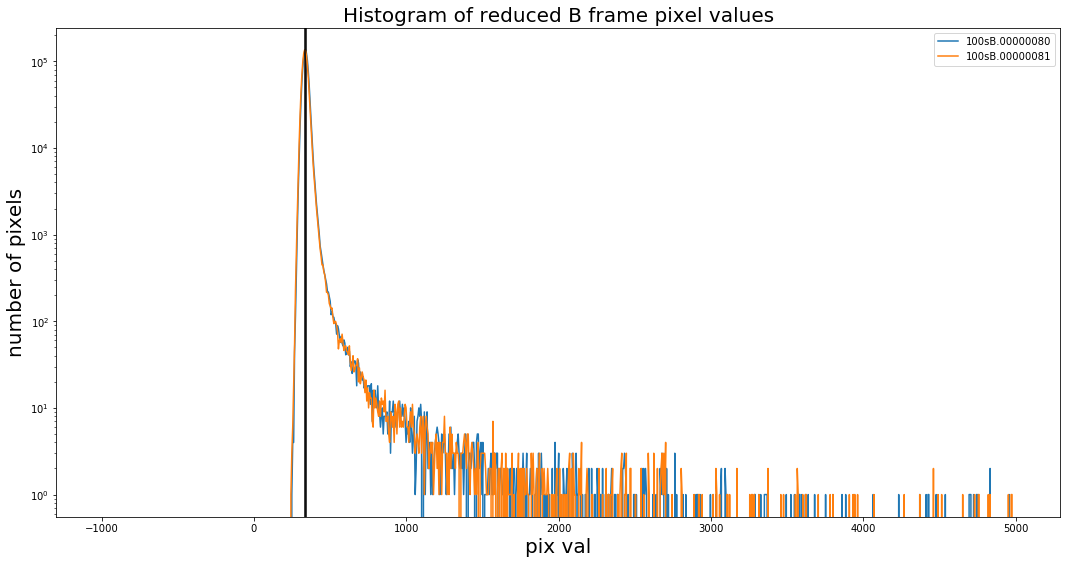

In [31]:
plt.figure(figsize=(18,9))
skylevels=[]
for i in range(len(B_reds)):
    numpix,aduvals=np.histogram(B_reds[i].flatten(),bins=1000,range=[-1e3,5e3])
    skylevel=aduvals[np.where(numpix==numpix.max())][0]
    skylevels.append(skylevel)
    plt.plot(aduvals[:-1],numpix,label=str(M51_B_name[i].split('/')[-1]))
    plt.axvline(skylevel,color='k')
plt.xlabel('pix val',fontsize=20)
plt.ylabel('number of pixels',fontsize=20)
plt.yscale('log')
plt.legend()
print (skylevels)
plt.title('Histogram of reduced B frame pixel values',fontsize=20)
plt.show()